In [1]:
#importing libraries
from scipy.optimize import curve_fit, least_squares
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd

In [6]:
df = pd.read_csv('data/star_data.csv')
x = df['x'].values
y = df['y'].values

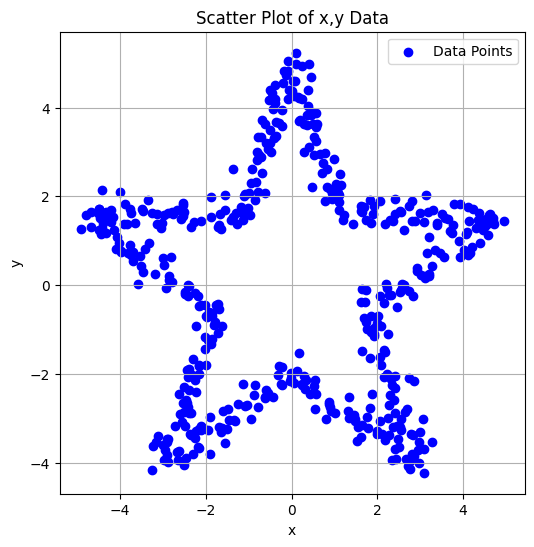

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(x, y, label="Data Points", color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of x,y Data")
plt.legend()
plt.grid(True)
plt.show()

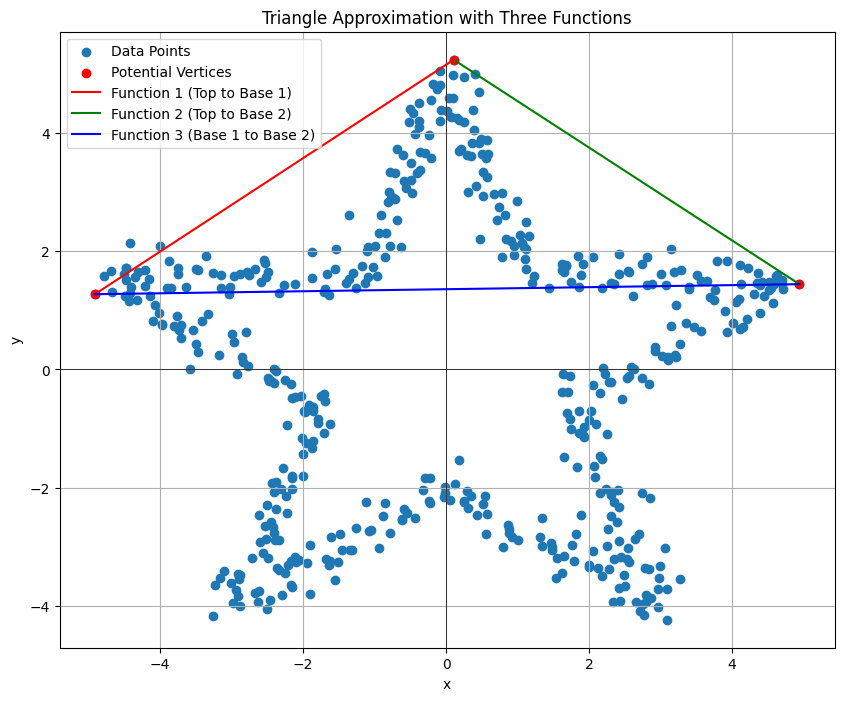


Submitted Function 1:
0.7895*x + 5.1510
x-bounds: [np.float64(-4.913265869653104), np.float64(0.1070843109825663)]

Submitted Function 2:
-0.7845*x + 5.3195
x-bounds: [np.float64(0.1070843109825663), np.float64(4.942939342670968)]

Submitted Function 3:
0.0172*x + 1.3567
x-bounds: [np.float64(-4.913265869653104), np.float64(4.942939342670968)]


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
try:
    df = pd.read_csv('data/star_data.csv')
    points = df[['x', 'y']].values
except FileNotFoundError:
    print("Error: triangle_data.csv not found. Please make sure the file is in the correct directory.")
    raise FileNotFoundError("triangle_data.csv not found. Please make sure the file is in the correct directory.")

# 1. Sort points by x-coordinate
sorted_indices_x = np.argsort(points[:, 0])
sorted_points_x = points[sorted_indices_x]

# 2. Identify potential "top" vertex (highest or lowest y in a central x-range)
x_range_start = int(len(sorted_points_x) * 0.3)
x_range_end = int(len(sorted_points_x) * 0.7)
central_points = sorted_points_x[x_range_start:x_range_end]

if len(central_points) > 0:
    top_vertex = central_points[np.argmax(central_points[:, 1])]
else:
    print("Warning: Could not identify a clear top vertex based on x-range.")
    top_vertex = sorted_points_x[len(sorted_points_x) // 2]

# 3. Identify potential "base" vertices (extremes in x)
base_vertex1 = sorted_points_x[0]  # Leftmost point
base_vertex2 = sorted_points_x[-1] # Rightmost point

# 4. Define the three functions (lines forming the sides)
def line_equation(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    if x2 - x1 == 0:
        return float('inf'), float('inf')
    m = (y2 - y1) / (x2 - x1)
    c = y1 - m * x1
    return m, c

# Function 1: Top vertex to base_vertex1 (left side)
m1, c1 = line_equation(top_vertex, base_vertex1)
x_bounds1 = [min(top_vertex[0], base_vertex1[0]), max(top_vertex[0], base_vertex1[0])]
func1_str = f"{m1:.4f}*x + {c1:.4f}"

# Function 2: Top vertex to base_vertex2 (right side)
m2, c2 = line_equation(top_vertex, base_vertex2)
x_bounds2 = [min(top_vertex[0], base_vertex2[0]), max(top_vertex[0], base_vertex2[0])]
func2_str = f"{m2:.4f}*x + {c2:.4f}"

# Function 3: Base vertex 1 to base vertex 2 (bottom)
m3, c3 = line_equation(base_vertex1, base_vertex2)
x_bounds3 = [min(base_vertex1[0], base_vertex2[0]), max(base_vertex1[0], base_vertex2[0])]
func3_str = f"{m3:.4f}*x + {c3:.4f}"

# 5. Plot the data and the three functions
plt.figure(figsize=(10, 8))
plt.scatter(points[:, 0], points[:, 1], label='Data Points')
plt.scatter([top_vertex[0], base_vertex1[0], base_vertex2[0]],
            [top_vertex[1], base_vertex1[1], base_vertex2[1]], color='red', label='Potential Vertices')
plt.title('Triangle Approximation with Three Functions')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

x_fit1 = np.linspace(x_bounds1[0], x_bounds1[1], 100)
y_fit1 = m1 * x_fit1 + c1
plt.plot(x_fit1, y_fit1, 'r-', label=f'Function 1 (Top to Base 1)')

x_fit2 = np.linspace(x_bounds2[0], x_bounds2[1], 100)
y_fit2 = m2 * x_fit2 + c2
plt.plot(x_fit2, y_fit2, 'g-', label=f'Function 2 (Top to Base 2)')

x_fit3 = np.linspace(x_bounds3[0], x_bounds3[1], 100)
y_fit3 = m3 * x_fit3 + c3
plt.plot(x_fit3, y_fit3, 'b-', label=f'Function 3 (Base 1 to Base 2)')

plt.legend()
plt.show()

# 6. Print the submitted functions and bounds
print("\nSubmitted Function 1:")
print(func1_str)
print("x-bounds:", x_bounds1)

print("\nSubmitted Function 2:")
print(func2_str)
print("x-bounds:", x_bounds2)

print("\nSubmitted Function 3:")
print(func3_str)
print("x-bounds:", x_bounds3)

Loaded data from data/star_data.csv

Calculating Line Functions (Outline):


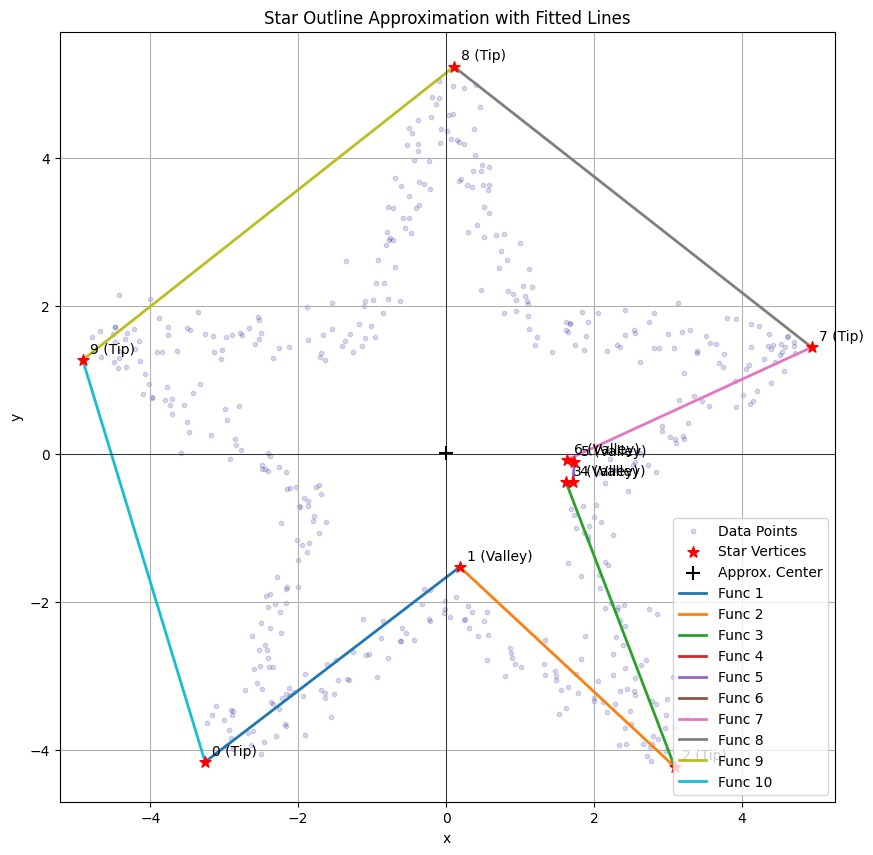


--- Submitted Functions and Bounds (Outline) ---

Function 1:
0.7658x + -1.6700
x-bounds: ['-3.2578', '0.1852']

Function 2:
-0.9299x + -1.3559
x-bounds: ['0.1852', '3.0903']

Function 3:
-2.6206x + 3.8689
x-bounds: ['1.6227', '3.0903']

Function 4:
0.0357x + -0.4416
x-bounds: ['1.6227', '1.7120']

Function 5:
10.8646x + -18.9804
x-bounds: ['1.7120', '1.7368']

Function 6:
-0.3057x + 0.4198
x-bounds: ['1.6352', '1.7368']

Function 7:
0.4601x + -0.8325
x-bounds: ['1.6352', '4.9429']

Function 8:
-0.7845x + 5.3195
x-bounds: ['0.1071', '4.9429']

Function 9:
0.7895x + 5.1510
x-bounds: ['-4.9133', '0.1071']

Function 10:
-3.2843x + -14.8647
x-bounds: ['-4.9133', '-3.2578']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Load your data (or use your generated points if needed)
try:
    df = pd.read_csv('data/star_data.csv')
    points = df[['x', 'y']].values
except:
    points = your_dummy_points_generation_function()

# Approximate center
center = points.mean(axis=0)

# Convert points to polar coordinates
dx, dy = points[:,0] - center[0], points[:,1] - center[1]
radii, angles = np.sqrt(dx**2 + dy**2), np.arctan2(dy, dx)

# Sort points by angle to form a continuous loop
sorted_indices = np.argsort(angles)
sorted_angles = angles[sorted_indices]
sorted_radii = radii[sorted_indices]

# Ensure the loop is closed by repeating first point at the end
sorted_angles = np.concatenate((sorted_angles, [sorted_angles[0] + 2*np.pi]))
sorted_radii = np.concatenate((sorted_radii, [sorted_radii[0]]))

# Fit CubicSpline (closed form)
cs = CubicSpline(sorted_angles, sorted_radii, bc_type='periodic')

# For visualization and bounds
theta_fine = np.linspace(sorted_angles[0], sorted_angles[-1], 1000)
radius_smooth = cs(theta_fine)

# Convert back to Cartesian for plotting
x_smooth = center[0] + radius_smooth * np.cos(theta_fine)
y_smooth = center[1] + radius_smooth * np.sin(theta_fine)

# Plotting
plt.figure(figsize=(8,8))
plt.scatter(points[:,0], points[:,1], alpha=0.3, label='Data Points')
plt.plot(x_smooth, y_smooth, 'r-', linewidth=2, label='Cubic Spline Fit')
plt.scatter(center[0], center[1], c='black', marker='+', s=100, label='Center')
plt.axis('equal')
plt.legend()
plt.title('Improved Star Approximation (Spline Regression)')
plt.show()

# Functions to submit: 
print("\n--- Submitted Cubic Spline Function and Angle Bounds ---")
print("Radius(theta) = CubicSpline(theta_angles, radius_values, periodic=True)")
print("Angle bounds: [{:.2f}, {:.2f}] radians".format(sorted_angles[0], sorted_angles[-1]))


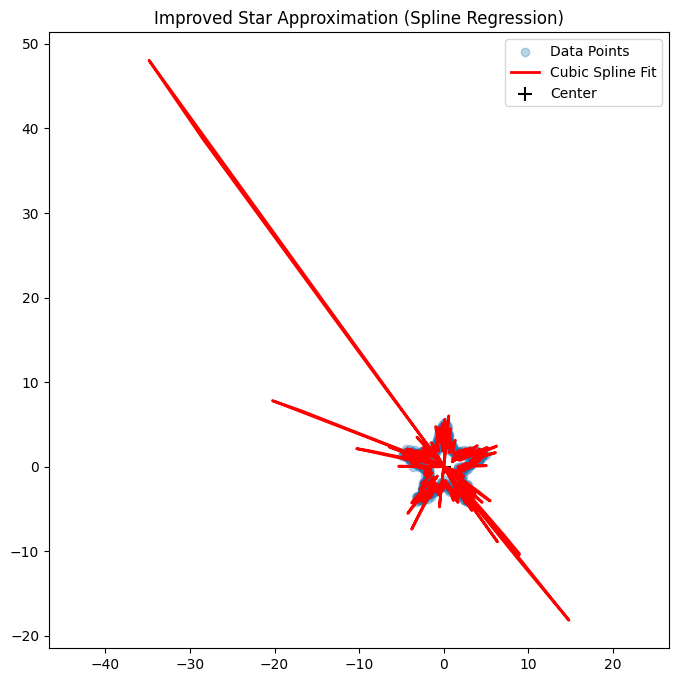


--- Submitted Cubic Spline Function and Angle Bounds ---
Radius(theta) = CubicSpline(theta_angles, radius_values, periodic=True)
Angle bounds: [-3.13, 3.16] radians


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Load your data (or use your generated points if needed)
try:
    df = pd.read_csv('data/star_data.csv')
    points = df[['x', 'y']].values
except:
    points = your_dummy_points_generation_function()

# Approximate center
center = points.mean(axis=0)

# Convert points to polar coordinates
dx, dy = points[:,0] - center[0], points[:,1] - center[1]
radii, angles = np.sqrt(dx**2 + dy**2), np.arctan2(dy, dx)

# Sort points by angle to form a continuous loop
sorted_indices = np.argsort(angles)
sorted_angles = angles[sorted_indices]
sorted_radii = radii[sorted_indices]

# Ensure the loop is closed by repeating first point at the end
sorted_angles = np.concatenate((sorted_angles, [sorted_angles[0] + 2*np.pi]))
sorted_radii = np.concatenate((sorted_radii, [sorted_radii[0]]))

# Fit CubicSpline (closed form)
cs = CubicSpline(sorted_angles, sorted_radii, bc_type='periodic')

# For visualization and bounds
theta_fine = np.linspace(sorted_angles[0], sorted_angles[-1], 1000)
radius_smooth = cs(theta_fine)

# Convert back to Cartesian for plotting
x_smooth = center[0] + radius_smooth * np.cos(theta_fine)
y_smooth = center[1] + radius_smooth * np.sin(theta_fine)

# Plotting
plt.figure(figsize=(8,8))
plt.scatter(points[:,0], points[:,1], alpha=0.3, label='Data Points')
plt.plot(x_smooth, y_smooth, 'r-', linewidth=2, label='Cubic Spline Fit')
plt.scatter(center[0], center[1], c='black', marker='+', s=100, label='Center')
plt.axis('equal')
plt.legend()
plt.title('Improved Star Approximation (Spline Regression)')
plt.show()

# Functions to submit: 
print("\n--- Submitted Cubic Spline Function and Angle Bounds ---")
print("Radius(theta) = CubicSpline(theta_angles, radius_values, periodic=True)")
print("Angle bounds: [{:.2f}, {:.2f}] radians".format(sorted_angles[0], sorted_angles[-1]))
